<a href="https://colab.research.google.com/github/hoax12/Learning/blob/master/Attentions_DLAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ATTENTIONS IN TRANSFORMER - {JOSH STARMER}

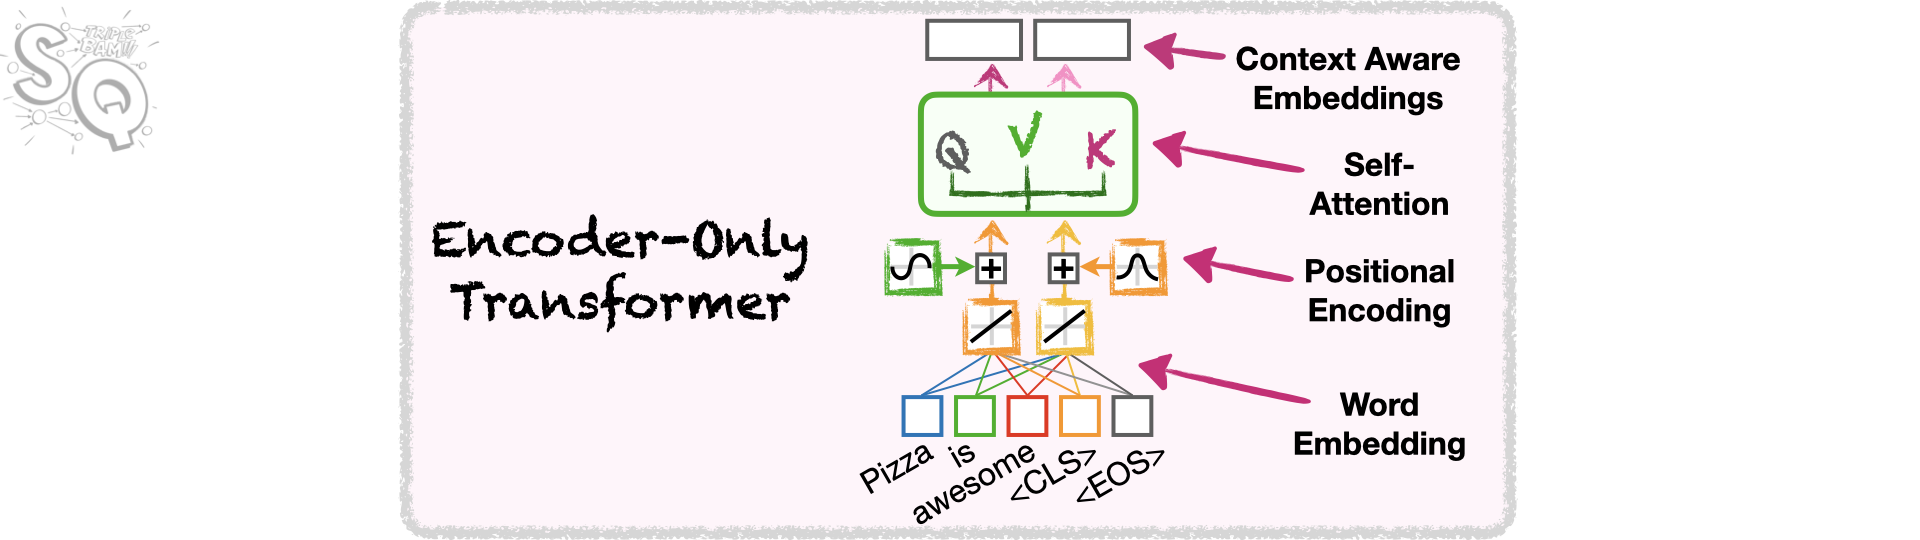

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

Self Attention Code -


In [4]:
class SelfAttention( nn.Module):
  def __init__(self, d_model = 2, row_dim = 0, col_dim = 1):
    ## d_model = the number of embedding values per token.
        ##           Because we want to be able to do the math by hand, we've
        ##           the default value for d_model=2.
        ##           However, in "Attention Is All You Need" d_model=512
        ##
        ## row_dim, col_dim = the indices we should use to access rows or columns

    super().__init__()

    #Lets initialize the weights (W) that we'll use to create the query(q), key(k) and value(v) for each token
    #"Attention Is All You Need" did not, so we won't either
    self.W_q = nn.Linear(in_features= d_model, out_features=d_model, bias=False)
    self.W_k = nn.Linear(in_features= d_model, out_features=d_model, bias=False)
    self.W_v = nn.Linear(in_features= d_model, out_features=d_model, bias=False)
    #nn.Linear() will cfreate a weight matrix for us
    #in_features defines the number of rows and out_features defines the number of columns
    self.row_dim = row_dim
    self.col_dim = col_dim

  def forward(self, token_encodings): #In this function we actually calculate the Self-Attention values for each token...
    #Create the query, key and values using the encoding numbers associated with each token ( token encodings)
    q = self.W_q(token_encodings)
    k = self.W_k(token_encodings)
    v = self.W_v(token_encodings)

    #Calculate the similarited scores: (q*k^T)
    sims = torch.matmul(q,k.transpose(dim0 = self.row_dim, dim1 = self.col_dim))

    #Scale the similarities by dividing by sqrt(k.col_dim)
    scaled_sims = sims/ torch.tensor(k.size(self.col_dim)**0.5)

    ##Apply softmax to determine what percent of each token's value to use in the final attention value
    attention_percents = F.softmax(scaled_sims, dim = self.col_dim)

    ##Scales the value by their associateed percentges and add them up.
    attention_scores = torch.matmul(attention_percents, v)

    return attention_scores


In [5]:
## create a matrix of token encodings...
encodings_matrix = torch.tensor([[1.16, 0.23],
                                 [0.57, 1.36],
                                 [4.41, -2.16]])

## set the seed for the random number generator
torch.manual_seed(42)

## create a basic self-attention ojbect
selfAttention = SelfAttention(d_model=2,row_dim=0,col_dim=1)

## calculate basic attention for the token encodings
selfAttention(encodings_matrix)

#grad_fn=<MmBackward0> This last bit of the tensor is used for training the Weights with Backpropagation.
#Since we are only training the self attention class and not full Transformer we wont be doing any training.

tensor([[1.0100, 1.0641],
        [0.2040, 0.7057],
        [3.4989, 2.2427]], grad_fn=<MmBackward0>)

In [6]:
## print out the weight matrix that creates the queries
selfAttention.W_q.weight.transpose(0, 1)

tensor([[ 0.5406, -0.1657],
        [ 0.5869,  0.6496]], grad_fn=<TransposeBackward0>)

In [7]:
## print out the weight matrix that creates the keys
selfAttention.W_k.weight.transpose(0, 1)

tensor([[-0.1549, -0.3443],
        [ 0.1427,  0.4153]], grad_fn=<TransposeBackward0>)

In [8]:
## print out the weight matrix that creates the values
selfAttention.W_v.weight.transpose(0, 1)

tensor([[ 0.6233,  0.6146],
        [-0.5188,  0.1323]], grad_fn=<TransposeBackward0>)

In [9]:
## calculate the queries
selfAttention.W_q(encodings_matrix)

tensor([[ 0.7621, -0.0428],
        [ 1.1063,  0.7890],
        [ 1.1164, -2.1336]], grad_fn=<MmBackward0>)

In [10]:
## calculate the keys
selfAttention.W_k(encodings_matrix)

tensor([[-0.1469, -0.3038],
        [ 0.1057,  0.3685],
        [-0.9914, -2.4152]], grad_fn=<MmBackward0>)

In [11]:
## calculate the values
selfAttention.W_v(encodings_matrix)

tensor([[ 0.6038,  0.7434],
        [-0.3502,  0.5303],
        [ 3.8695,  2.4246]], grad_fn=<MmBackward0>)

In [12]:
q = selfAttention.W_q(encodings_matrix)
q

tensor([[ 0.7621, -0.0428],
        [ 1.1063,  0.7890],
        [ 1.1164, -2.1336]], grad_fn=<MmBackward0>)

In [13]:
k = selfAttention.W_k(encodings_matrix)
k

tensor([[-0.1469, -0.3038],
        [ 0.1057,  0.3685],
        [-0.9914, -2.4152]], grad_fn=<MmBackward0>)

In [14]:
sims = torch.matmul(q, k.transpose(dim0=0, dim1=1))
sims

tensor([[-0.0990,  0.0648, -0.6523],
        [-0.4022,  0.4078, -3.0024],
        [ 0.4842, -0.6683,  4.0461]], grad_fn=<MmBackward0>)

In [15]:
scaled_sims = sims / (torch.tensor(2)**0.5)
scaled_sims

tensor([[-0.0700,  0.0458, -0.4612],
        [-0.2844,  0.2883, -2.1230],
        [ 0.3424, -0.4725,  2.8610]], grad_fn=<DivBackward0>)

In [16]:
attention_percents = F.softmax(scaled_sims, dim=1)
attention_percents

tensor([[0.3573, 0.4011, 0.2416],
        [0.3410, 0.6047, 0.0542],
        [0.0722, 0.0320, 0.8959]], grad_fn=<SoftmaxBackward0>)

In [17]:
torch.matmul(attention_percents, selfAttention.W_v(encodings_matrix))

tensor([[1.0100, 1.0641],
        [0.2040, 0.7057],
        [3.4989, 2.2427]], grad_fn=<MmBackward0>)

MaskedSelfAttention


In [18]:
class MaskedSelfAttention(nn.Module):

    def __init__(self, d_model=2, row_dim=0, col_dim=1):

        super().__init__()

        self.W_q = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=d_model, bias=False)

        self.row_dim = row_dim
        self.col_dim = col_dim


    def forward(self, token_encodings, mask=None):

        q = self.W_q(token_encodings)
        k = self.W_k(token_encodings)
        v = self.W_v(token_encodings)

        sims = torch.matmul(q, k.transpose(dim0=self.row_dim, dim1=self.col_dim))

        scaled_sims = sims / torch.tensor(k.size(self.col_dim)**0.5)

        if mask is not None:
            ## Here we are masking out things we don't want to pay attention to
            ##
            ## We replace values we wanted masked out
            ## with a very small negative number so that the SoftMax() function
            ## will give all masked elements an output value (or "probability") of 0.
            scaled_sims = scaled_sims.masked_fill(mask=mask, value=-1e9) # I've also seen -1e20 and -9e15 used in masking

        attention_percents = F.softmax(scaled_sims, dim=self.col_dim)

        attention_scores = torch.matmul(attention_percents, v)

        return attention_scores

Calculate Masked Self-Attention

In [19]:
## create a matrix of token encodings...
encodings_matrix = torch.tensor([[1.16, 0.23],
                                 [0.57, 1.36],
                                 [4.41, -2.16]])

## set the seed for the random number generator
torch.manual_seed(42)

## create a masked self-attention object
maskedSelfAttention = MaskedSelfAttention(d_model=2,
                               row_dim=0,
                               col_dim=1)

## create the mask so that we don't use
## tokens that come after a token of interest
mask = torch.tril(torch.ones(3, 3))
mask = mask == 0
mask # print out the mask

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

In [20]:
## calculate masked self-attention
maskedSelfAttention(encodings_matrix, mask)

tensor([[ 0.6038,  0.7434],
        [-0.0062,  0.6072],
        [ 3.4989,  2.2427]], grad_fn=<MmBackward0>)

In [21]:
## print out the weight matrix that creates the queries
maskedSelfAttention.W_q.weight.transpose(0, 1)

tensor([[ 0.5406, -0.1657],
        [ 0.5869,  0.6496]], grad_fn=<TransposeBackward0>)

In [22]:
## print out the weight matrix that creates the queries
maskedSelfAttention.W_q.weight.transpose(0, 1)

tensor([[ 0.5406, -0.1657],
        [ 0.5869,  0.6496]], grad_fn=<TransposeBackward0>)

In [23]:
## print out the weight matrix that creates the keys
maskedSelfAttention.W_k.weight.transpose(0, 1)

tensor([[-0.1549, -0.3443],
        [ 0.1427,  0.4153]], grad_fn=<TransposeBackward0>)

In [24]:
## print out the weight matrix that creates the values
maskedSelfAttention.W_v.weight.transpose(0, 1)

tensor([[ 0.6233,  0.6146],
        [-0.5188,  0.1323]], grad_fn=<TransposeBackward0>)

In [25]:
## print out the weight matrix that creates the values
maskedSelfAttention.W_v.weight.transpose(0, 1)

tensor([[ 0.6233,  0.6146],
        [-0.5188,  0.1323]], grad_fn=<TransposeBackward0>)

In [26]:
## calculate the queries
maskedSelfAttention.W_q(encodings_matrix)

tensor([[ 0.7621, -0.0428],
        [ 1.1063,  0.7890],
        [ 1.1164, -2.1336]], grad_fn=<MmBackward0>)

In [27]:
## calculate the keys
maskedSelfAttention.W_k(encodings_matrix)

tensor([[-0.1469, -0.3038],
        [ 0.1057,  0.3685],
        [-0.9914, -2.4152]], grad_fn=<MmBackward0>)

In [28]:
## calculate the values
maskedSelfAttention.W_v(encodings_matrix)

tensor([[ 0.6038,  0.7434],
        [-0.3502,  0.5303],
        [ 3.8695,  2.4246]], grad_fn=<MmBackward0>)

In [29]:
q = maskedSelfAttention.W_q(encodings_matrix)
q

tensor([[ 0.7621, -0.0428],
        [ 1.1063,  0.7890],
        [ 1.1164, -2.1336]], grad_fn=<MmBackward0>)

In [30]:
k = maskedSelfAttention.W_k(encodings_matrix)
k

tensor([[-0.1469, -0.3038],
        [ 0.1057,  0.3685],
        [-0.9914, -2.4152]], grad_fn=<MmBackward0>)

In [31]:
sims = torch.matmul(q, k.transpose(dim0=0, dim1=1))
sims

tensor([[-0.0990,  0.0648, -0.6523],
        [-0.4022,  0.4078, -3.0024],
        [ 0.4842, -0.6683,  4.0461]], grad_fn=<MmBackward0>)

In [32]:
scaled_sims = sims / (torch.tensor(2)**0.5)

In [33]:
scaled_sims

tensor([[-0.0700,  0.0458, -0.4612],
        [-0.2844,  0.2883, -2.1230],
        [ 0.3424, -0.4725,  2.8610]], grad_fn=<DivBackward0>)

In [34]:
masked_scaled_sims = scaled_sims.masked_fill(mask=mask, value=-1e9)
masked_scaled_sims

tensor([[-6.9975e-02, -1.0000e+09, -1.0000e+09],
        [-2.8442e-01,  2.8833e-01, -1.0000e+09],
        [ 3.4241e-01, -4.7253e-01,  2.8610e+00]],
       grad_fn=<MaskedFillBackward0>)

In [35]:
attention_percents = F.softmax(masked_scaled_sims, dim=1)
attention_percents

tensor([[1.0000, 0.0000, 0.0000],
        [0.3606, 0.6394, 0.0000],
        [0.0722, 0.0320, 0.8959]], grad_fn=<SoftmaxBackward0>)

In [36]:
torch.matmul(attention_percents, maskedSelfAttention.W_v(encodings_matrix))

tensor([[ 0.6038,  0.7434],
        [-0.0062,  0.6072],
        [ 3.4989,  2.2427]], grad_fn=<MmBackward0>)

Code Attention

In [37]:
class Attention(nn.Module):

    def __init__(self, d_model=2,
                 row_dim=0,
                 col_dim=1):

        super().__init__()

        self.W_q = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_k = nn.Linear(in_features=d_model, out_features=d_model, bias=False)
        self.W_v = nn.Linear(in_features=d_model, out_features=d_model, bias=False)

        self.row_dim = row_dim
        self.col_dim = col_dim


    ## The only change from SelfAttention and attention is that
    ## now we expect 3 sets of encodings to be passed in...
    def forward(self, encodings_for_q, encodings_for_k, encodings_for_v, mask=None):
        ## ...and we pass those sets of encodings to the various weight matrices.
        q = self.W_q(encodings_for_q)
        k = self.W_k(encodings_for_k)
        v = self.W_v(encodings_for_v)

        sims = torch.matmul(q, k.transpose(dim0=self.row_dim, dim1=self.col_dim))

        scaled_sims = sims / torch.tensor(k.size(self.col_dim)**0.5)

        if mask is not None:
            scaled_sims = scaled_sims.masked_fill(mask=mask, value=-1e9)

        attention_percents = F.softmax(scaled_sims, dim=self.col_dim)

        attention_scores = torch.matmul(attention_percents, v)

        return attention_scores

In [38]:
## create matrices of token encodings...
encodings_for_q = torch.tensor([[1.16, 0.23],
                                [0.57, 1.36],
                                [4.41, -2.16]])

encodings_for_k = torch.tensor([[1.16, 0.23],
                                [0.57, 1.36],
                                [4.41, -2.16]])

encodings_for_v = torch.tensor([[1.16, 0.23],
                                [0.57, 1.36],
                                [4.41, -2.16]])

## set the seed for the random number generator
torch.manual_seed(42)

## create an attention object
attention = Attention(d_model=2,
                      row_dim=0,
                      col_dim=1)

## calculate encoder-decoder attention
attention(encodings_for_q, encodings_for_k, encodings_for_v)

tensor([[1.0100, 1.0641],
        [0.2040, 0.7057],
        [3.4989, 2.2427]], grad_fn=<MmBackward0>)

In [39]:
class MultiHeadAttention(nn.Module):

    def __init__(self,
                 d_model=2,
                 row_dim=0,
                 col_dim=1,
                 num_heads=1):

        super().__init__()

        ## create a bunch of attention heads
        self.heads = nn.ModuleList(
            [Attention(d_model, row_dim, col_dim)
             for _ in range(num_heads)]
        )

        self.col_dim = col_dim

    def forward(self,
                encodings_for_q,
                encodings_for_k,
                encodings_for_v):

        ## run the data through all of the attention heads
        return torch.cat([head(encodings_for_q,
                               encodings_for_k,
                               encodings_for_v)
                          for head in self.heads], dim=self.col_dim)

Calcualte Multi-Head Attention

In [43]:
## set the seed for the random number generator
torch.manual_seed(42)

## create an attention object
multiHeadAttention = MultiHeadAttention(d_model=2,
                                        row_dim=0,
                                        col_dim=1,
                                        num_heads=1)

## calculate encoder-decoder attention
multiHeadAttention(encodings_for_q, encodings_for_k, encodings_for_v)

tensor([[1.0100, 1.0641],
        [0.2040, 0.7057],
        [3.4989, 2.2427]], grad_fn=<CatBackward0>)

In [41]:
## set the seed for the random number generator
torch.manual_seed(42)

## create an attention object
multiHeadAttention = MultiHeadAttention(d_model=2,
                                        row_dim=0,
                                        col_dim=1,
                                        num_heads=2)

## calculate encoder-decoder attention
multiHeadAttention(encodings_for_q, encodings_for_k, encodings_for_v)

tensor([[ 1.0100,  1.0641, -0.7081, -0.8268],
        [ 0.2040,  0.7057, -0.7417, -0.9193],
        [ 3.4989,  2.2427, -0.7190, -0.8447]], grad_fn=<CatBackward0>)